In [14]:
import dipy as dp
import glob as glob
import os
from dipy.io.image import load_nifti, save_nifti
import numpy as np
from dipy.denoise.patch2self import patch2self
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
print(dp.__version__)

1.4.0


In [3]:
STUDY_PATH='/NAS/deathrow/protocoles/MEDU_ST_PHI/'
IMAGES_DIR=os.path.join(STUDY_PATH,'images')
TRACTO_DIR=os.path.join(STUDY_PATH,'tracto')
FILE_PATH=os.path.join(STUDY_PATH,'liste_pts.csv')

In [4]:
BValFile_MB_TR4600=sorted(glob.glob(os.path.join(IMAGES_DIR,'*','*ORIG_DTI_MB_2500_600_15_9_3X3*.bval')))
BValFile_MB_TR2600=sorted(glob.glob(os.path.join(IMAGES_DIR,'*','*ORIG_DTI_MB_4600_600_15_5_3X*.bval')))
BValFile_NoMB=sorted(glob.glob(os.path.join(IMAGES_DIR,'*','*ORIG_DTI_PAS_MB_4600_600_15_5_3X*.bval')))

In [15]:
print(cpt)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [17]:
for cpt in (np.arange(0,len(BValFile_NoMB),1)):
    data, affine = load_nifti(BValFile_NoMB[cpt].replace('bval','nii'))
    bvals = np.loadtxt(BValFile_NoMB[cpt])
    denoised_arr = patch2self(data, bvals)

    # Gets the center slice and the middle volume of the 4D diffusion data.
    sli = data.shape[2] // 2
    gra = 12  # pick out a random volume for a particular gradient direction

    orig = data[:, :, sli, gra]
    den = denoised_arr[:, :, sli, gra]

    # computes the residuals
    rms_diff = np.sqrt((orig - den) ** 2)

    fig1, ax = plt.subplots(1, 3, figsize=(12, 6),
                            subplot_kw={'xticks': [], 'yticks': []})

    fig1.subplots_adjust(hspace=0.3, wspace=0.05)

    ax.flat[0].imshow(orig.T, cmap='gray', interpolation='none',
                      origin='lower')
    ax.flat[0].set_title('Original')
    ax.flat[1].imshow(den.T, cmap='gray', interpolation='none',
                      origin='lower')
    ax.flat[1].set_title('Denoised Output')
    ax.flat[2].imshow(rms_diff.T, cmap='gray', interpolation='none',
                      origin='lower')
    ax.flat[2].set_title('Residuals')

    fig1.savefig('denoised_'+str(cpt)+'_patch2self.png')
    print('The result saved in denoised_'+str(cpt)+'_patch2self.png')
    break

/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_0_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_1_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_2_patch2self.png
The result saved in denoised_3_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_4_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_5_patch2self.png
The result saved in denoised_6_patch2self.png
The result saved in denoised_7_patch2self.png
The result saved in denoised_8_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_9_patch2self.png
The result saved in denoised_10_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_11_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_12_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_13_patch2self.png
The result saved in denoised_14_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_15_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


The result saved in denoised_16_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_17_patch2self.png
The result saved in denoised_18_patch2self.png


/home/global/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


The result saved in denoised_19_patch2self.png


In [6]:
listeFilesROI=sorted(glob.glob(os.path.join(TRACTO_DIR,'*','*','ROIPAT*resliced.nii.gz')))
print(len(listeFilesROI))


60


In [7]:
listeFilesROI

['/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00001/ORIG_DTI_MB_2500_600_15_9_3X3/ROIPAT00001_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00001/ORIG_DTI_MB_4600_600_15_5_3X3/ROIPAT00001_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00001/ORIG_DTI_PAS_MB_4600_600_15_5_3X3/ROIPAT00001_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00002/ORIG_DTI_MB_2500_600_15_9_3X3/ROIPAT00002_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00002/ORIG_DTI_MB_4600_600_15_5_3X3/ROIPAT00002_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00002/ORIG_DTI_PAS_MB_4600_600_15_5_3X3/ROIPAT00002_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00003/ORIG_DTI_MB_2500_600_15_9_3X3/ROIPAT00003_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00003/ORIG_DTI_MB_4600_600_15_5_3X3/ROIPAT00003_resliced.nii.gz',
 '/NAS/deathrow/protocoles/MEDU_ST_PHI/tracto/PAT00003/ORIG_DTI_PAS_MB_4

In [ ]:
for cpt,file in enumerate(listeFilesROI):
    SUBJ=file.split('/')[6]
    DIR=file.split('/')[7]
    print(file,SUBJ,DIR)
    struct = nib.load(file)
    struct_data=np.asanyarray(struct.dataobj)
    for val in [10,50,100,255,200,300,400,500] :

In [20]:
from dipy.segment.mask import median_otsu
data, affine = load_nifti(BValFile_NoMB[0].replace('bval','nii'))
bvals = np.loadtxt(BValFile_NoMB[0])
sli = data.shape[2] // 2
gra = 0  # pick out a random volume for a particular gradient direction

orig = data[:, :, sli, gra]
b0_mask, mask = median_otsu(orig, median_radius=2, numpass=4)

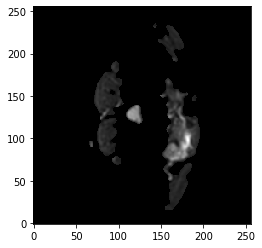

In [21]:
plt.imshow(b0_mask, cmap='gray', interpolation='none',origin='lower')

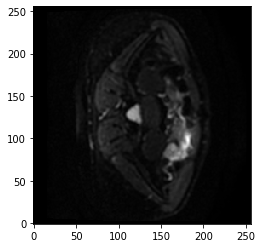